Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Pendulum"

In [89]:
import numpy as np
from tqdm import tqdm
from pendulum_env_extended import PendulumEnvExtended
import random 
import matplotlib.pyplot as plt

In [90]:
env = PendulumEnvExtended(render_mode="rgb_array")

In [91]:
max_steps= env.max_steps
max_steps

700

Discretización de los estados

In [92]:
x_space_partitions = 21
y_space_partitions = 21
vel_space_partitions = 100

In [93]:
x_space = np.linspace(-1, 1, x_space_partitions)
x_space

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [94]:
y_space = np.linspace(-1, 1, x_space_partitions)
y_space

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [95]:

vel_space = np.linspace(-8, 8, vel_space_partitions)
vel_space

array([-8.        , -7.83838384, -7.67676768, -7.51515152, -7.35353535,
       -7.19191919, -7.03030303, -6.86868687, -6.70707071, -6.54545455,
       -6.38383838, -6.22222222, -6.06060606, -5.8989899 , -5.73737374,
       -5.57575758, -5.41414141, -5.25252525, -5.09090909, -4.92929293,
       -4.76767677, -4.60606061, -4.44444444, -4.28282828, -4.12121212,
       -3.95959596, -3.7979798 , -3.63636364, -3.47474747, -3.31313131,
       -3.15151515, -2.98989899, -2.82828283, -2.66666667, -2.50505051,
       -2.34343434, -2.18181818, -2.02020202, -1.85858586, -1.6969697 ,
       -1.53535354, -1.37373737, -1.21212121, -1.05050505, -0.88888889,
       -0.72727273, -0.56565657, -0.4040404 , -0.24242424, -0.08080808,
        0.08080808,  0.24242424,  0.4040404 ,  0.56565657,  0.72727273,
        0.88888889,  1.05050505,  1.21212121,  1.37373737,  1.53535354,
        1.6969697 ,  1.85858586,  2.02020202,  2.18181818,  2.34343434,
        2.50505051,  2.66666667,  2.82828283,  2.98989899,  3.15

Obtener el estado a partir de la observación

In [96]:
def get_state(obs):
    x, y, vel = obs
    x_bin = np.digitize(x, x_space)
    y_bin = np.digitize(y, y_space)
    vel_bin = np.digitize(vel, vel_space)
    return x_bin, y_bin, vel_bin

In [97]:
state = get_state(np.array([-0.4, 0.2, 0.3]))
state

(6, 12, 52)

Discretización de las acciones

In [98]:
actions_partitions = 21

In [99]:
actions = list(np.linspace(-2, 2, actions_partitions))

In [100]:
def get_sample_action():
    return random.choice(actions)

Inicilización de la tabla Q

In [101]:
Q = np.zeros((len(x_space) + 1, len(y_space) + 1, len(vel_space) + 1, len(actions)))
Q

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

Obtención de la acción a partir de la tabla Q

In [102]:
def optimal_policy(state, Q):
    action = actions[np.argmax(Q[state])]
    return action

Epsilon-Greedy Policy

In [103]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = get_sample_action()
    # exploit
    else:
        action = optimal_policy(state, Q)
        
    return action

Ejemplo de episodio 

In [104]:
obs,_ = env.reset()
done = False
total_reward = 0
state = get_state(obs)
while not done:
    # Acción del modelo
    action = epsilon_greedy_policy(state, Q, 0.5)
    
    # Indice de la accion en Q
    action_idx = actions.index(action)
    
    # Acción del ambiente
    real_action = np.array([action_idx])
     
    obs, reward, done, _, _ = env.step(real_action)
    next_state = get_state(obs)
    
   # Usar action_idx para actualizar Q
   
    total_reward += reward
    print('->', state, action, reward, obs, done)
print('total_reward', total_reward)

-> (19, 5, 44) -2.0 -0.37407442752973413 [ 0.82232356 -0.56902015 -1.2892141 ] False
-> (19, 5, 44) -0.5999999999999999 -0.5366120917698134 [ 0.7800111 -0.6257657 -1.4159793] False
-> (19, 5, 44) 0.20000000000000018 -0.6616281728501575 [ 0.7280125  -0.68556386 -1.5853034 ] False
-> (19, 5, 44) -2.0 -0.8219145242765507 [ 0.65217084 -0.758072   -2.0994763 ] False
-> (19, 5, 44) 0.8000000000000003 -1.1849852278031339 [ 0.55805755 -0.8298023  -2.3680303 ] False
-> (19, 5, 44) -2.0 -1.5187147372050016 [ 0.42822167 -0.9036737  -2.990382  ] False
-> (19, 5, 44) -2.0 -2.1672370301223216 [ 0.25622723 -0.9666166  -3.6681373 ] False
-> (19, 5, 44) 0.6000000000000001 -3.070025595119762 [ 0.05443518 -0.99851733 -4.0930996 ] False
-> (19, 5, 44) -0.7999999999999998 -3.978616087809048 [-0.17178103 -0.98513514 -4.541988  ] False
-> (19, 5, 44) -0.5999999999999999 -5.1065260762444815 [-0.40929317 -0.9124029  -4.9808393 ] False
-> (19, 5, 44) 0.8000000000000003 -6.454834777117947 [-0.6364881  -0.7712865

In [105]:
max_steps = env.max_steps

In [106]:
epsilon = 0.99

In [107]:
alpha = 0.05
alpha

0.05

In [108]:
gamma = 0.9
gamma

0.9

In [109]:
episodes=50000

In [110]:
rewards=[]
steps=[]

In [111]:
i=0
for i in tqdm(range(episodes)):
    obs,_ = env.reset()
    done = False
    total_reward = 0    
    total_steps = 0 
    state = get_state(obs)
    while not done:        
        action = epsilon_greedy_policy(state, Q, epsilon)
        action_idx = actions.index(action)    
        real_action = np.array([action_idx])

        obs, reward, done, _, _ = env.step(real_action)

        next_state = get_state(obs)

        total_steps += 1 
        total_reward += reward

        value = Q[state][action_idx] + alpha * (reward + (gamma* (np.max(Q[next_state]))) - Q[state][action_idx] )
        Q[state][action_idx] = value

        state = next_state
    i+=1
    if (i % 5== 0) and (epsilon > 0.01):  
        epsilon *= 0.99
    rewards.append(total_reward)
    steps.append(total_steps)

100%|██████████| 50000/50000 [31:18<00:00, 26.62it/s] 


In [112]:
epsilon

0.009920974201040588

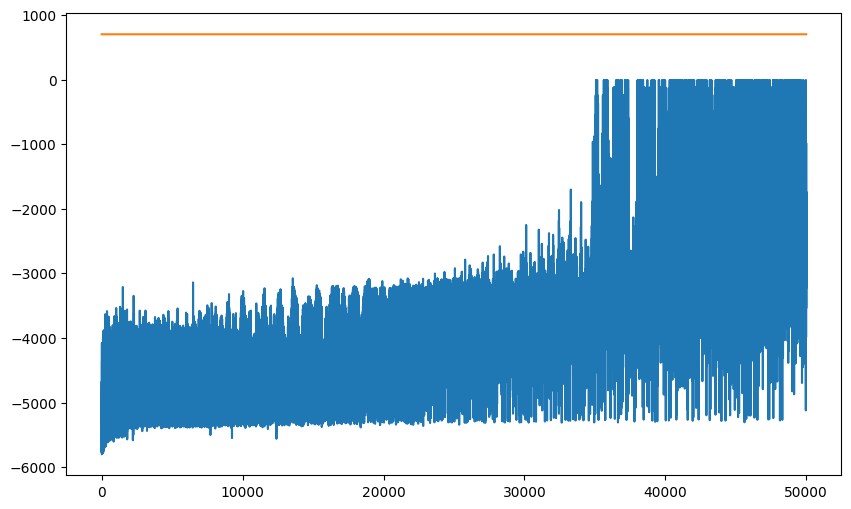

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [114]:
average_steps = np.mean(steps)
print("average steps: ", average_steps)
average_rewards = np.mean(rewards)
print("Average rewards: ", average_rewards)

average steps:  700.0
Average rewards:  -3615.4572065107877


In [115]:
Q

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

### Render

In [116]:
obs,_ = env.reset()
done = False
total_reward = 0
state = get_state(obs)
while not done:
    action = epsilon_greedy_policy(state, Q, 0.1)
    action_idx = actions.index(action)
    real_action = np.array([action_idx])
     
    obs, reward, done, _, _ = env.step(real_action)
    next_state = get_state(obs)
   
    total_reward += reward
    env.render()
    
print('total_reward', total_reward)

total_reward -4990.56517697473
